In [1]:

import matplotlib as mpl
mpl.rcParams['text.usetex'] = False

import matplotlib.pyplot as plt
from matplotlib import ticker
import matplotlib.colors as colors
import numpy as np 
from pathlib import Path
import numpy.linalg as npl
import os

import pherosensor
from source_localization.control import Control

import sys
os.chdir('../')
from gen_geom import geom
msh = geom()
from gen_obs import obs 
obs = obs()
xv, yv = np.meshgrid(msh.x, msh.y, sparse=True, indexing="ij")

path_case = os.getcwd()
path_data = path_case + '/data'

In [2]:
S_value = np.load(Path(path_data) / 'S_target.npy')
ctrl_target_current_t = np.copy(S_value[0, :, :])

S_value_background = np.load(Path(path_data) / 'S_background.npy')
ctrl_background_current_t = np.copy(S_value_background[0, :, :])

In [3]:
X_sensor = np.copy(obs.X_sensors)
n_sensors = X_sensor.shape[0]
colors = ['b', 'g', 'm', 'r']
symbols = ['o', 's', '*', 'X', 'P', 'D', 'v', '^', '<', '>', 'p', 'h']

is_z1 = 0
is_z2 = 0
is_z3 = 0
is_z4 = 0

colors_symbols_list=[]
for i, X in enumerate(X_sensor):
    if X[0]<0.5*np.max(msh.x) and X[1]<0.5*np.max(msh.y):
        colors_symbols_list.append(colors[0]+symbols[is_z1])
        is_z1 += 1
    if X[0]<0.5*np.max(msh.x) and X[1]>0.5*np.max(msh.y):
        colors_symbols_list.append(colors[1]+symbols[is_z2])
        is_z2 += 1
    if X[0]>0.5*np.max(msh.x) and X[1]<0.5*np.max(msh.y):
        colors_symbols_list.append(colors[2]+symbols[is_z3])
        is_z3 += 1
    if X[0]>0.5*np.max(msh.x) and X[1]>0.5*np.max(msh.y):
        colors_symbols_list.append(colors[3]+symbols[is_z4])
        is_z4 += 1
colors_symbols = np.array(colors_symbols_list)

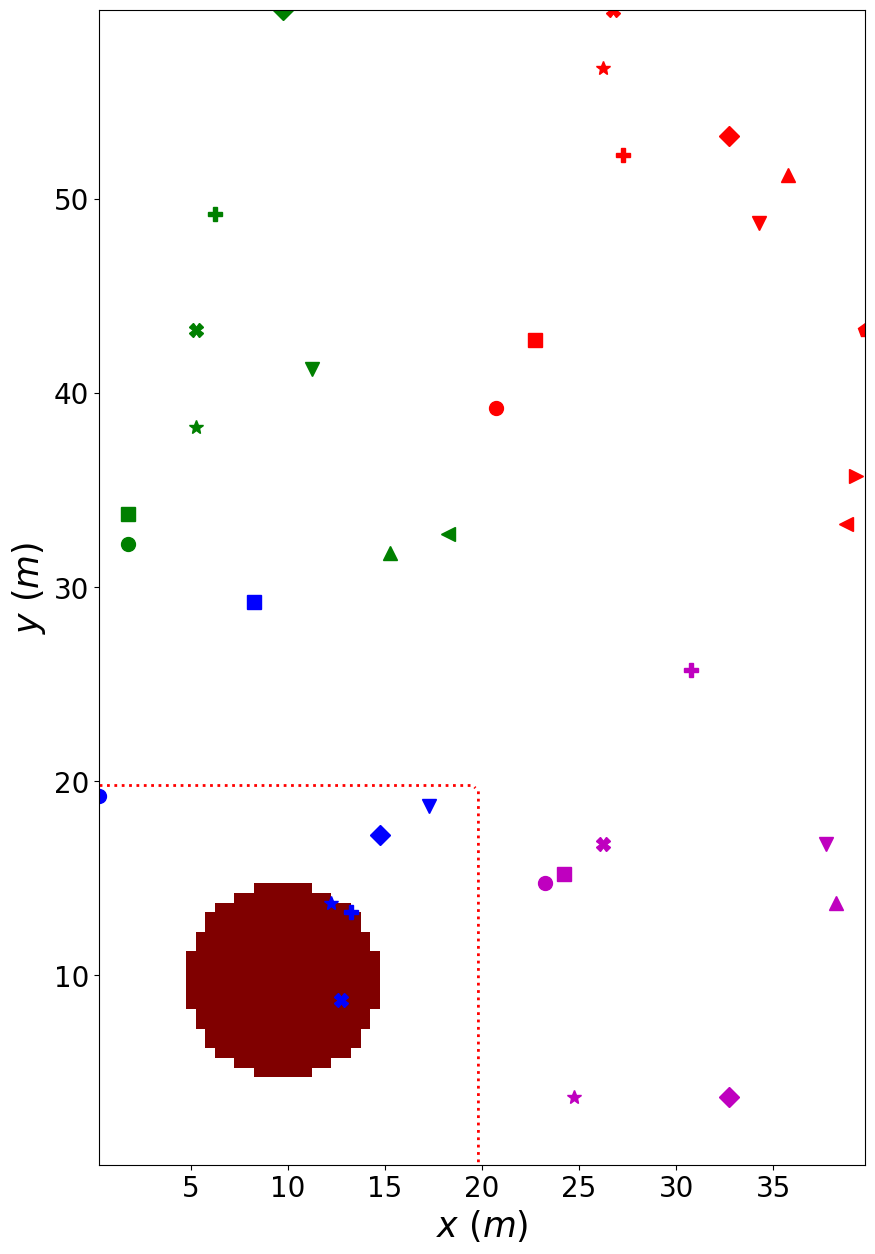

In [4]:
fontsize = 25
plt.figure(figsize=(20,15))

ctrl_support = np.copy(ctrl_target_current_t)
ctrl_support = np.where(ctrl_target_current_t>1e-8, ctrl_target_current_t, -np.nan)
plt.pcolormesh(xv[:, 0]-np.min(msh.x), yv[0, :]-np.min(msh.y), ctrl_support, cmap='jet', vmin=0, vmax=np.max(ctrl_target_current_t))

cntr = plt.contour(msh.x-np.min(msh.x), msh.y-np.min(msh.y), ctrl_background_current_t, colors='r', linestyles='dotted', levels=[np.max(ctrl_target_current_t)*0.5], linewidths=2.)
fmt = ticker.LogFormatterMathtext()
fmt.create_dummy_axis()
plt.clabel(cntr, cntr.levels, inline=True, fontsize=fontsize, fmt=fmt)

for i, X in enumerate(X_sensor):
    plt.plot(X[0], X[1], colors_symbols[i],markersize=10)
    
plt.xlabel("$x$ ($m$)", fontsize=fontsize)
plt.ylabel("$y$ ($m$)", fontsize=fontsize)
plt.xlim(np.min(msh.x), np.max(msh.x))
plt.ylim(np.min(msh.y), np.max(msh.y))
plt.gca().set_aspect('equal')
plt.tick_params(labelsize=fontsize - 5)

plt.show()

#path_save = 'TO BE DEFINED'
#file_name = 'sensor_location'
#plt.savefig(Path(path_save) / f"{file_name}.png", format='png', bbox_inches="tight")